In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [48]:
img = cv2.imread('line 1.jpeg')

In [49]:
cv2.imshow('image', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [50]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(img, 100,150)

In [51]:
cv2.imshow('gambar Tepi parkiran', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [52]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [53]:
height = img.shape[0]
width = img.shape[1]
region_of_interest_vertices = [(0, height),(width/2, height/2),(width, height)]

In [54]:
gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image, 100, 200)
cropped_image = region_of_interest(canny_image,
                np.array([region_of_interest_vertices], np.int32),)

In [55]:
lines = cv2.HoughLinesP(cropped_image, rho=6, theta=np.pi/180, threshold=160, lines=np.array([]), minLineLength=40, maxLineGap=25)
img_line = img.copy()

In [56]:
for line in lines:
    x1, y1, x2, y2, = line[0]
    cv2.line(img_line, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

In [57]:
cv2.imshow("Gambar Garis Parkiran", img_line)
cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Setelah Edges')

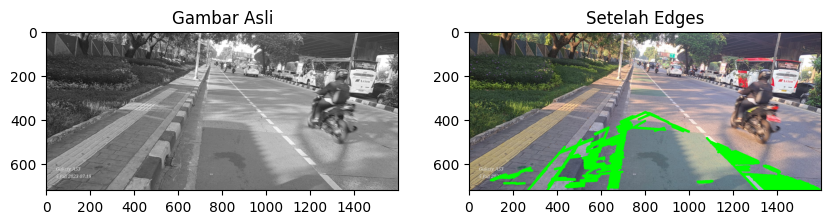

In [58]:
gray1 = cv2.cvtColor(img_line, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1,2, figsize = (10,10))
ax = axs.ravel()

ax[0].imshow(gray, cmap= 'gray')
ax[0].set_title('Gambar Asli')

ax[1].imshow(gray1, cmap= 'gray')
ax[1].set_title('Setelah Edges')